In [2]:
import matplotlib.pyplot as plt
import numpy as np

%precision 3

'%.3f'

In [142]:
# %% 4.9.確認問題
# (1) リッジ回帰モデルを学習する反復式の導出
#   確率的勾配降下法でリッジ回帰モデルを学習したい．確率的勾配降下法の反復式を導出せよ．

# (2) L_2正則化を反復式から解釈する
#   リッジ回帰では，学習中にパラメータベクトルのL_2ノルムが大きくなりすぎないように制御する．
#  （1）で導出した反復式から，パラメータベクトルが大きくなりすぎるのを防ぐメカニズムを導出せよ．

# (3)リッジ回帰の実装
#   確率的勾配降下法でリッジ回帰のパラメータを推定するアルゴリズムを実装し，以下のデータに対して多項式近似
#   の曲線を求めよ．ただし，便利なモジュール等は使わずに，この資料で説明した式・アルゴリズムをプログラムとして
#   表現すること．多項式近似の次数やリッジ回帰の係数αなどのハイパーパラメータは適当に設定せよ．
X = np.array([ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ])
Y = np.array([-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08])
# X = [ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ]
# Y = [-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08]
# np.random.seed(0)


(3)
[ 0.083 -0.173 -0.289 -0.308 -0.284 -0.248 -0.21  -0.175 -0.145 -0.12 ]


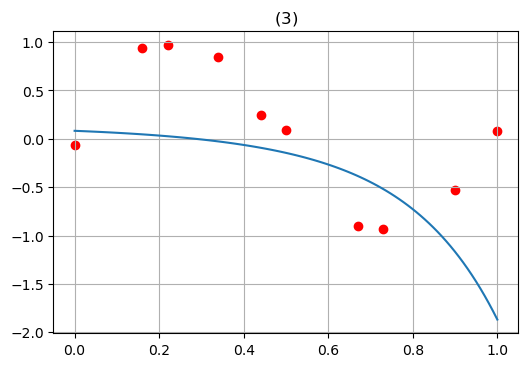

In [157]:
print('(3)')
def estimateParameta(X, Y, n=1, max_epochs=40000, eta0=0.03, eps=1e-8, alpha=0):
    # X = np.vstack([X, np.ones_like(X)]).T
    X = np.array([X**0,X**1,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]).T
    w = np.zeros(X.shape[1])
    # H = []
    for t in range(max_epochs):
        eta = eta0 / np.sqrt(t+1)
        i = np.random.randint(0, X.shape[0])
        y_hat = X[i].T @ w
        # grad = 2*(y_hat - Y[i]) * X[i] + 2*alpha*w
        grad = 2*X[i].T*w - 2*X[i].T*Y[i] + 2*alpha*w
        # H.append(w)
        if np.sum(np.abs(grad)) < eps:
            break
        w -= eta * grad
    return w
        

w = estimateParameta(X, Y, max_epochs=10000)
# w = np.polyfit(X, Y, 9)
print(w)
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, c='r')
xs = np.linspace(0, 1, 100)
y_hat = w[0] + w[1]*xs + w[2]*xs**2 + w[3]*xs**3 + w[4]*xs**4 + w[5]*xs**5 + w[6]*xs**6 + w[7]*xs**7 + w[8]*xs**8 + w[9]*xs**9
# y_hat = np.polyval(w, xs)
ax.plot(xs, y_hat)
ax.set_title('$(3)$')
ax.grid()
plt.show()

In [145]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

ab = np.array([a, b])
ab

array([[1, 2, 3],
       [4, 5, 6]])